# First Step of Data Preparation Process

In this notebook file, raw images will be read with opencv library.

Persons with more than 4 photos will be saved as a pandas dataframe with their names and specified IDs.

Images of persons will be saved as Training, Validation and Test dataframes with match their IDs.

Images samples will be drawn.

All dataframes will be saved as pkl files for future use after being checked.

See All images gzipped tar file, in http://vis-www.cs.umass.edu/lfw/ for dataset.

All folders in the lfw folder inside the lfw.tgz file have been copied to the /Data/RawData/FaceImage/ path.

In [1]:
#Libraries are being imported
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('cv2 Version: ' + cv2.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
cv2 Version: 4.5.1
pandas Version: 1.4.3
matplotlib Version: 3.5.2


In [3]:
#Function to draw Image
def DrawImage(imgDf : pd.DataFrame, personDf : pd.DataFrame) -> None:
    plt.figure(figsize=(10,10))
    
    for i in range(imgDf.shape[0]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #matplotlib works in RGB color space by default
        #since the images are kept in BGR color space due to the use of opencv in this project
        #color conversion is required to draw a picture
        plt.imshow(cv2.cvtColor(imgDf.iloc[i].ImageBGR, cv2.COLOR_BGR2RGB))
        
        plt.xlabel(personDf.iloc[imgDf.iloc[i].PersonID].Name)
        
    plt.show()
    
    return

In [4]:
#Images are being read from raw image files
#cv2 library works with BGR color ordering instead of RGB by default.
#see https://learnopencv.com/why-does-opencv-use-bgr-color-format/ for more information.
#Since all reading and writing operations will be done with the cv2 library, 
#Images will be used in BGR format in order not to make continuous color conversions in the living application.

#The data is being splitted as training and test data.
#For ensuring each person will be represented in both training and test data.

#Although it seems that 0.33 of the data is being splitted as test data in the codes,
#this ratio is being expected to be between (0.25 - 0.33) since the Floor division operator was used for each person.

#The splitting of test data is being done in the first step.
#In this way, models can be trained on the same training dataset.
#So, the performance difference caused by randomly splitting the training data with better quality will be eliminated.
#Thus, it will be possible to see more accurately which model or parameters are better.

person = []
trainingImage = []
testImage = []
imageSize = {}

personCounter = 0
directory = os.listdir('../Data/RawData/FaceImage/')

for s in directory:
    path, dirName, file = next(os.walk('../Data/RawData/FaceImage/' + s))
    
    #Whether there are different directories within the directories is being checked.
    if len(dirName) > 0:
        print('Warning: Another directory is detected in ' + path)
    
    #Those with less than 5 photos are being ignored
    fileSize = len(file)
    
    if fileSize > 4:
        person.append({'ID' : personCounter, 'Name' : s.replace('_', ' ')})
        counter = 0
        
        for f in file:
            img = cv2.imread('../Data/RawData/FaceImage/' + s  + '/' + f)
            
            #Shape of the images are being checked
            if imageSize.get(img.shape) is None:
                print('New image shape detected ' + str(img.shape) + ' in ' +  '../Data/RawData/FaceImage/' + s  + '/' + f)
                imageSize[img.shape] = 1
            
            else:
                imageSize[img.shape] += 1
                
            if counter < fileSize // 3:
                testImage.append({'PersonID' : personCounter, 'ImageBGR' : img})
            
            else:
                trainingImage.append({'PersonID' : personCounter, 'ImageBGR' : img})
            
            counter += 1
        personCounter += 1

New image shape detected (250, 250, 3) in ../Data/RawData/FaceImage/Abdullah_Gul/Abdullah_Gul_0001.jpg


In [5]:
#Size of imageSize Dictionary is being printed
len(imageSize)

1

In [6]:
#imageSize Dictionary is being printed 
imageSize

{(250, 250, 3): 5985}

In [7]:
#Size of person Dictionary is being printed
len(person)

423

In [8]:
#person Dictionary is being printed
person

[{'ID': 0, 'Name': 'Abdullah Gul'},
 {'ID': 1, 'Name': 'Adrien Brody'},
 {'ID': 2, 'Name': 'Ahmed Chalabi'},
 {'ID': 3, 'Name': 'Ai Sugiyama'},
 {'ID': 4, 'Name': 'Alan Greenspan'},
 {'ID': 5, 'Name': 'Alastair Campbell'},
 {'ID': 6, 'Name': 'Albert Costa'},
 {'ID': 7, 'Name': 'Alejandro Toledo'},
 {'ID': 8, 'Name': 'Ali Naimi'},
 {'ID': 9, 'Name': 'Allyson Felix'},
 {'ID': 10, 'Name': 'Alvaro Uribe'},
 {'ID': 11, 'Name': 'Al Gore'},
 {'ID': 12, 'Name': 'Al Sharpton'},
 {'ID': 13, 'Name': 'Amelia Vega'},
 {'ID': 14, 'Name': 'Amelie Mauresmo'},
 {'ID': 15, 'Name': 'Ana Guevara'},
 {'ID': 16, 'Name': 'Ana Palacio'},
 {'ID': 17, 'Name': 'Andre Agassi'},
 {'ID': 18, 'Name': 'Andy Roddick'},
 {'ID': 19, 'Name': 'Angela Bassett'},
 {'ID': 20, 'Name': 'Angela Merkel'},
 {'ID': 21, 'Name': 'Angelina Jolie'},
 {'ID': 22, 'Name': 'Anna Kournikova'},
 {'ID': 23, 'Name': 'Ann Veneman'},
 {'ID': 24, 'Name': 'Antonio Banderas'},
 {'ID': 25, 'Name': 'Antonio Palocci'},
 {'ID': 26, 'Name': 'Ariel Shar

In [9]:
#Size of trainingImage Dictionary is being printed
#since this Dictionary contains image information, printing it will create a messy look
len(trainingImage)

4156

In [10]:
#Size of testImage Dictionary is being printed
#since this Dictionary contains image information, printing it will create a messy look
len(testImage)

1829

In [11]:
#personDf is being created
personDf = pd.DataFrame(person).set_index('ID')
del person
personDf

,Name
ID,
0,Abdullah Gul
1,Adrien Brody
2,Ahmed Chalabi
3,Ai Sugiyama
4,Alan Greenspan
...,...
418,Yasser Arafat
419,Yoko Ono
420,Yoriko Kawaguchi


In [12]:
#trainingDf is being created
trainingDf = pd.DataFrame(trainingImage)
del trainingImage
trainingDf

,PersonID,ImageBGR
0,0,"[[[57, 106, 128], [80, 129, 151], [69, 118, 14..."
1,0,"[[[85, 115, 140], [85, 115, 140], [85, 115, 14..."
2,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,0,"[[[115, 130, 133], [105, 119, 125], [99, 110, ..."
...,...,...
4151,421,"[[[139, 149, 137], [141, 151, 139], [146, 156,..."
4152,422,"[[[254, 236, 207], [254, 236, 207], [254, 236,..."
4153,422,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4154,422,"[[[176, 150, 150], [179, 151, 151], [183, 153,..."


In [13]:
#trainingDf is being shuffled
trainingDf = trainingDf.sample(frac=1).reset_index(drop=True)
trainingDf

,PersonID,ImageBGR
0,22,"[[[42, 19, 17], [42, 19, 17], [42, 19, 17], [4..."
1,125,"[[[29, 43, 55], [29, 43, 55], [29, 43, 55], [2..."
2,356,"[[[59, 59, 53], [58, 58, 52], [57, 57, 51], [5..."
3,277,"[[[37, 32, 29], [37, 32, 31], [38, 33, 32], [3..."
4,131,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
4151,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4152,120,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4153,322,"[[[193, 202, 211], [193, 202, 211], [193, 205,..."
4154,383,"[[[10, 13, 51], [10, 13, 51], [11, 13, 53], [1..."


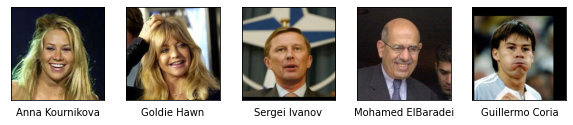

In [14]:
#First 5 images of trainingDf are being drawn
DrawImage(trainingDf.head(), personDf)

In [15]:
#testDf is being created
testDf = pd.DataFrame(testImage)
testDf

,PersonID,ImageBGR
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,0,"[[[26, 65, 74], [29, 68, 77], [30, 69, 78], [2..."
2,0,"[[[255, 255, 245], [255, 254, 243], [254, 252,..."
3,0,"[[[182, 210, 217], [172, 199, 209], [109, 135,..."
4,0,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
...,...,...
1824,421,"[[[108, 129, 137], [108, 129, 137], [107, 128,..."
1825,421,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1826,421,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1827,422,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [16]:
#validation data is being splitted from testDf
validationDf = testDf.sample(frac=0.5)
validationDf

,PersonID,ImageBGR
530,120,"[[[214, 235, 237], [214, 235, 237], [212, 235,..."
337,80,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1619,373,"[[[2, 0, 3], [3, 0, 2], [3, 0, 2], [2, 0, 0], ..."
1110,210,"[[[3, 12, 39], [3, 12, 39], [3, 12, 39], [2, 1..."
466,119,"[[[16, 21, 124], [16, 21, 124], [17, 21, 126],..."
...,...,...
354,85,"[[[0, 1, 2], [0, 0, 0], [0, 1, 0], [3, 1, 0], ..."
1738,393,"[[[20, 15, 16], [18, 13, 14], [18, 13, 12], [2..."
1349,287,"[[[125, 90, 56], [126, 91, 57], [126, 91, 57],..."
838,154,"[[[1, 2, 0], [0, 2, 0], [0, 2, 0], [0, 1, 0], ..."


In [17]:
#Data that is not splitted as validation data is being held as test data
testDf = testDf.drop(validationDf.index)
testDf

,PersonID,ImageBGR
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,0,"[[[255, 255, 245], [255, 254, 243], [254, 252,..."
4,0,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
5,0,"[[[183, 187, 181], [184, 188, 182], [183, 187,..."
9,1,"[[[29, 63, 87], [23, 57, 80], [21, 54, 74], [2..."
...,...,...
1821,420,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1822,420,"[[[245, 219, 203], [245, 219, 203], [245, 219,..."
1823,420,"[[[58, 73, 75], [58, 73, 75], [58, 73, 75], [5..."
1825,421,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [18]:
#validationDf is being shuffled
validationDf = validationDf.sample(frac=1).reset_index(drop=True)
validationDf

,PersonID,ImageBGR
0,171,"[[[28, 8, 3], [28, 8, 3], [28, 8, 3], [28, 8, ..."
1,120,"[[[13, 20, 15], [13, 20, 15], [13, 20, 15], [1..."
2,196,"[[[60, 67, 60], [60, 67, 60], [60, 67, 60], [5..."
3,95,"[[[94, 131, 175], [98, 135, 179], [99, 136, 18..."
4,380,"[[[84, 37, 15], [83, 36, 14], [83, 36, 14], [8..."
...,...,...
909,71,"[[[2, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0], ..."
910,183,"[[[58, 34, 22], [54, 29, 19], [45, 23, 12], [4..."
911,120,"[[[4, 0, 0], [2, 0, 0], [2, 0, 0], [2, 0, 0], ..."
912,120,"[[[27, 51, 71], [26, 50, 70], [26, 50, 68], [2..."


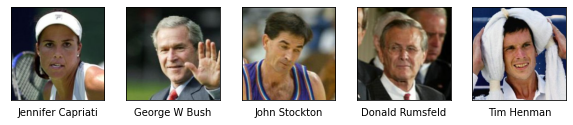

In [19]:
#First 5 images of validationDf are being drawn
DrawImage(validationDf.head(), personDf)

In [20]:
#testDf is being shuffled
testDf = testDf.sample(frac=1).reset_index(drop=True)
testDf

,PersonID,ImageBGR
0,270,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ..."
1,80,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,14,"[[[100, 142, 119], [100, 142, 119], [100, 142,..."
3,120,"[[[166, 148, 131], [168, 148, 131], [162, 140,..."
4,401,"[[[9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], ..."
...,...,...
910,291,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
911,302,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
912,401,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
913,340,"[[[9, 32, 77], [9, 32, 77], [9, 32, 77], [10, ..."


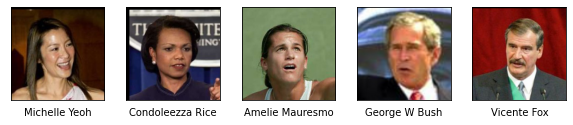

In [21]:
#First 5 images of testDf are being drawn
DrawImage(testDf.head(), personDf)

In [22]:
#Selected data is being saved as pkl file for future use
personDf.to_pickle("../Data/RawData/Selected/Person.pkl")
trainingDf.to_pickle("../Data/RawData/Selected/Training.pkl")
validationDf.to_pickle("../Data/RawData/Selected/Validation.pkl")
testDf.to_pickle("../Data/RawData/Selected/Test.pkl")